In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
data = pd.read_csv('/Users/lijinze/Documents/2019年8月资料/数据挖掘实践/data.csv', encoding='gbk')
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,NaN,19890,0,30.0,20130817.0,149050,151.0,0.40,34030,7.0,3920,0.15,1020,0.55,一线城市,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170,6.0,0.0,1970,18040,0.0,1,xs,1738.0,85.0,蒋红,583.0,79.0,8.0,2.0,6.0,10.0,2018-04-25,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2018-04-19,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,1.0,16970,0,23.0,20160402.0,302910,224.0,0.35,10590,5.0,6950,0.05,1210,0.50,一线城市,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100,9.0,0.0,1820,15680,0.0,0,xs,779.0,84.0,崔向朝,653.0,73.0,7.0,4.0,2.0,8.0,2018-05-03,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2018-05-05,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,NaN,9710,0,9.0,20170617.0,11520,31.0,1.00,5710,5.0,840,0.65,570,0.65,一线城市,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0,3.0,0.0,0,0,0.0,1,xs,338.0,95.0,王中云,654.0,76.0,11.0,5.0,5.0,16.0,2018-05-05,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,2018-05-01,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,NaN,6210,0,33.0,20130516.0,491130,360.0,0.15,91690,7.0,46850,0.05,1290,0.45,三线城市,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140,9.0,0.0,2700,27970,0.0,0,xs,1831.0,82.0,何洋洋,595.0,79.0,12.0,7.0,4.0,22.0,2018-05-05,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,2018-05-03,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.

- 数据集划分

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=2018)


In [16]:
y_train = train_data.status.values
y_test = test_data.status.values

X_train = train_data.drop('status', axis = 1)
X_test = test_data.drop('status', axis = 1)

## 特征产生

## IV特征选择

## 随机森林

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import roc_auc_score
print('auc:',roc_auc_score(y_test,y_pred))

auc: 0.5877250807155706


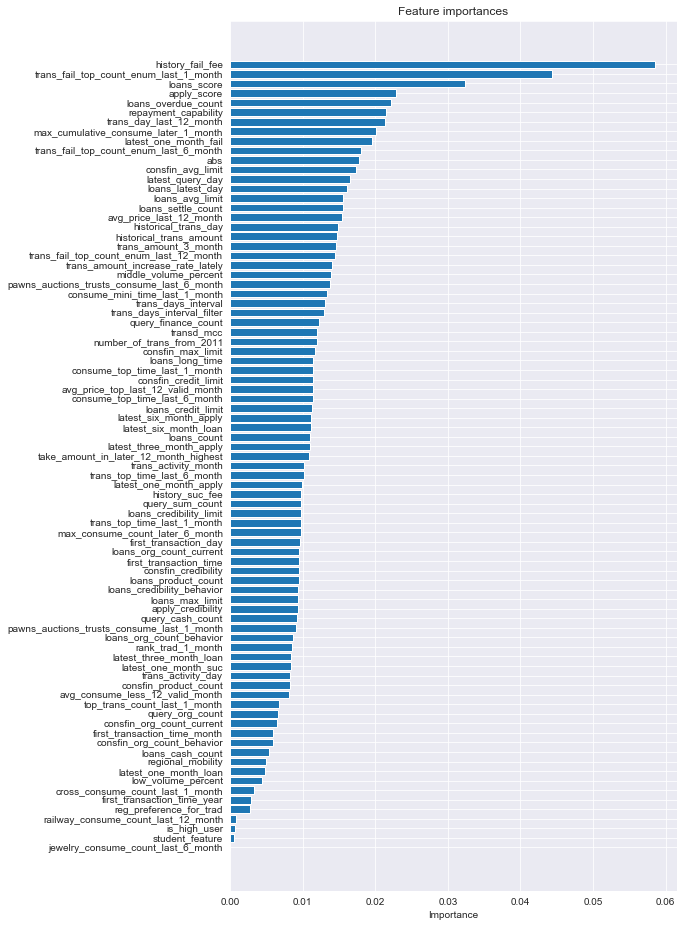

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
 
features_list = X_train.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(8,16))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

- 可见特征筛选后提高了一点

In [19]:
select_fea = features_list[sorted_idx][10:]
X_train = X_train[select_fea]
X_test = X_test[select_fea]

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import roc_auc_score
print('auc:',roc_auc_score(y_test,y_pred))

auc: 0.5902813179343845


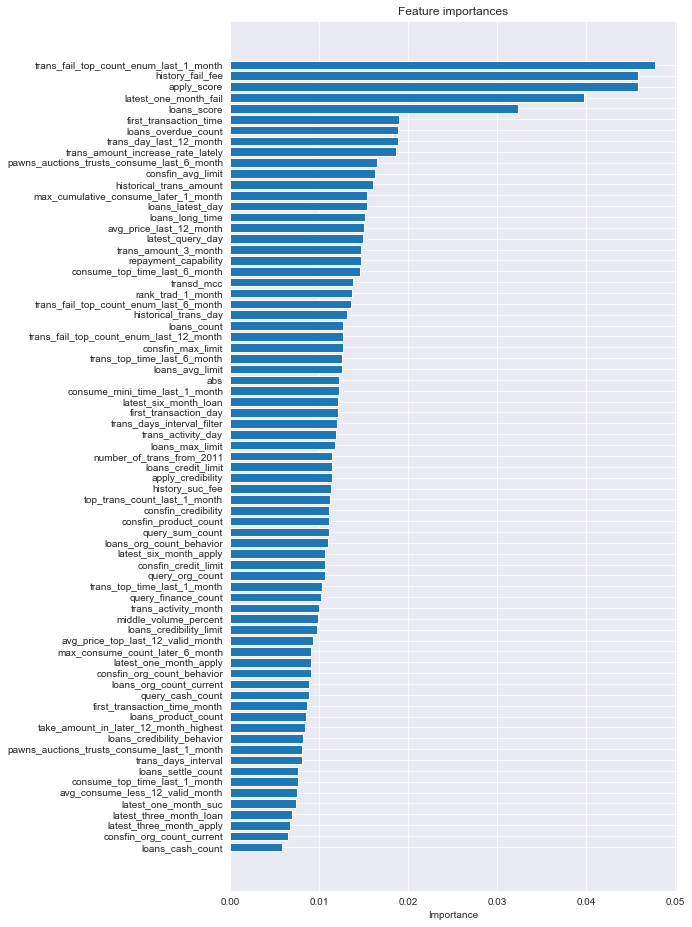

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
 
features_list = X_train.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(8,16))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()